# 证明题

首先写出对数线性回归公式：

$$log(y)=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_nX_n+\epsilon$$

其中，$\beta_0,\beta_1,...,\beta_n$是模型的回归系数，$X_1,X_2,...,X_n$是自变量，$\epsilon$是误差项

令$\beta=[\beta_0,\beta_1,...,\beta_n]'$，$X=[X_1,X_2,...,X_n]'$，可以将原等式写为$log(y)=\beta'X+\epsilon$

发现$\beta'X+\epsilon$服从正态分布，因此可知$e^{\beta'X+\epsilon}$服从对数正态分布

根据对数正态分布的性质，如果$log(S)\sim N(\mu,\sigma^2)$，则$E(S)=e^{\mu+\frac{1}{2}\sigma^2}$

因此代入可得，$E(y)=E(e^{\beta'X+\epsilon})=e^{\mu+\frac{1}{2}\sigma^2}=e^{\beta'X+\frac{1}{2}\sigma^2}$

# 金融行业岗位分析及算法实现

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1
数据读入和数据概览

In [2]:
finance_df_original = pd.read_excel('financejob.xlsx')

In [5]:
# 进行数据概览
finance_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16195 entries, 0 to 16194
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     16195 non-null  object 
 1   nature      16195 non-null  object 
 2   size        16195 non-null  object 
 3   sector      16195 non-null  object 
 4   position    16173 non-null  object 
 5   descrip     16160 non-null  object 
 6   salary      16195 non-null  float64
 7   education   16195 non-null  object 
 8   experience  16195 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [3]:
finance_df_original.head()

,company,nature,size,sector,position,descrip,salary,education,experience
0,盛世投资集团,民营,20-99人,"基金,证券,期货,投资",文化执行董事,岗位职责潜在LP挖掘及转化 潜在合作渠道开发及转化 分析文化行业投资机会，寻找和洽谈潜在投资...,25000.5,不限,不限
1,北京东扬国际投资管理有限公司,民营,100-499人,"基金,证券,期货,投资",文员助理,岗位职责1起草和修改报告文稿等；2及时准确的更新员工通讯录；管理公司网络邮箱；3负责日常办...,9000.5,不限,不限
2,盈创置地北京投资有限公司,合资,20-99人,"基金,证券,期货,投资",物业公司总经理_唐山_,职位描述 1根据集团发展战略，全面实施物业公司的经营方针，主持物业公司的日常生产...,40000.5,大专,5_10年
3,首创证券有限责任公司,股份制企业,500-999人,"基金,证券,期货,投资",固定收益事业部_发行项目承做,岗位职责1 项目承揽阶段，协助开展客户开发和项目承接工作，制作项目建议书等；2 项目实施阶段...,9000.5,硕士及以上,1_3年
4,北京友财投资管理有限公司,民营,20-99人,"基金,证券,期货,投资",债权投资助理,岗位职责1寻找项目投资机会，包括债权和股权项目；2项目分析，包括对接融资方企业尽调项目分析上...,9000.5,本科,1_3年


In [59]:
# 根据要求，保留expericence的7个字段：不限，无经验，1年以下，1-3年，3-5年，5-10年，10年以上
# 定义包含所需取值的列表
experience_list = ['不限', '无经验', '1年以下', '1_3年', '3_5年', '5_10年', '10年以上']

# 筛选'experience'列中取值在指定列表中的行
finance_df = finance_df_original[finance_df_original['experience'].isin(experience_list)].copy()

## Q2
对数变换

In [76]:
# 对'salary'列进行对数变换，结果保存为'lnsalary'列
finance_df['lnsalary'] = np.log(finance_df['salary'])

## Q3
绘制直方图

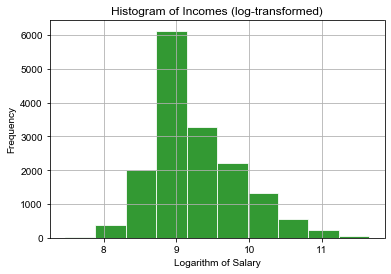

In [42]:
# 绘制'lnsalary'列的直方图
plt.hist(finance_df['lnsalary'], bins=10, color='green', alpha=0.8, edgecolor='white')

# 添加标题和轴标签
plt.grid()
plt.title('Histogram of Incomes (log-transformed)')
plt.xlabel('Logarithm of Salary')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [27]:
finance_df['lnsalary'].describe()

count    16191.000000
mean         9.282878
std          0.604465
min          7.467371
25%          8.853737
50%          9.105035
75%          9.615805
max         11.652687
Name: lnsalary, dtype: float64

从对数薪资直方图来看，数据呈现右偏分布，9左右的对数薪资频数最高，超过了6000。平均对数薪资为9.28，中位数对数薪资为9.11，说明少数高薪资拉高了平均水平。最高对数薪资为11.65，最低为7.47。

## Q4
绘制箱线图

In [36]:
# 以下代码从全局设置字体为Arial Unicode MS，解决显示中文问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 解决中文字体下坐标轴负数的负号显示问题
plt.rcParams['axes.unicode_minus'] = False 

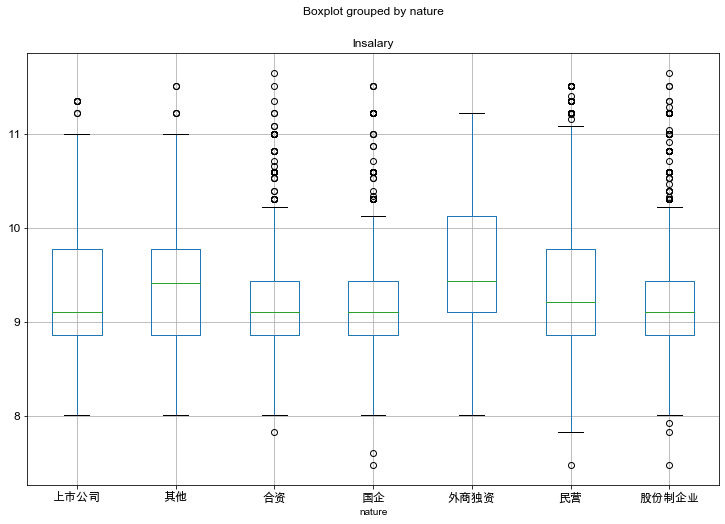

In [45]:
finance_df.boxplot(column='lnsalary', by='nature', figsize=(12, 8), fontsize='large')
plt.show()

从箱线图中可以看出，外商独资和其他、民营这三类的对数薪资整体上比较高，外商独资的最值高于其它6类公司，且其Q1约等于国企的Q2，这些数据表现也符合大众的预期，即去外资、民营企业一般能拿到更高的工资。

从箱子宽度也即薪资范围来看，合资、国企、股份制企业的薪资范围比较窄，说明在这些企业更有可能“吃大锅饭”。

从离群值来看，外商独资、上市公司、其他这三类公司的离群值数量很少，而国企、合资、股份制企业的离群值较多，且大都是高于最大值，说明在这些地方存在少部分员工能获得非常高的薪资。

## Q5
回归分析

In [57]:
dummy_base = ['国企', '20人以下', '银行', '本科', '1_3年']
x_sector = ['nature', 'size', 'sector', 'education', 'experience']

In [62]:
for idx, cur_dummy_base in enumerate(dummy_base):
    cur_x_sector = x_sector[idx]
    
    # 将原始数据集中的列转换为分类变量类型
    finance_df[cur_x_sector] = finance_df[cur_x_sector].astype('category')
    
    # 使用get_dummies()函数来创建dummy
    cur_dummy = pd.get_dummies(finance_df[cur_x_sector], prefix=cur_x_sector)
    
    # 将创建的dummy列与原始数据集合并
    finance_df = pd.concat([finance_df, cur_dummy], axis=1)
    
    # 删除基准组
    finance_df = finance_df.drop(columns=[cur_x_sector + '_' + cur_dummy_base])

In [65]:
finance_df.iloc[0].keys()

Index(['company', 'nature', 'size', 'sector', 'position', 'descrip', 'salary',
       'education', 'experience', 'nature_上市公司', 'nature_其他', 'nature_合资',
       'nature_外商独资', 'nature_民营', 'nature_股份制企业', 'size_100-499人',
       'size_1000-9999人', 'size_10000人以上', 'size_20-99人', 'size_500-999人',
       'sector_保险', 'sector_信托,担保,拍卖,典当', 'sector_基金,证券,期货,投资', 'education_不限',
       'education_大专', 'education_硕士及以上', 'experience_10年以上',
       'experience_1年以下', 'experience_3_5年', 'experience_5_10年',
       'experience_不限', 'experience_无经验'],
      dtype='object')

In [69]:
import statsmodels.api as sm

In [73]:
# 自变量的字段都带有下划线，用正则取出来
X_index = finance_df.filter(regex='_').columns

In [77]:
X = finance_df[X_index].copy()
y = finance_df['lnsalary']

In [79]:
# 添加常数项，用于估计截距
X = sm.add_constant(X)

In [82]:
# 构建线性回归模型
model = sm.OLS(y, X)

In [84]:
# 拟合线性回归模型
results = model.fit()

In [87]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               lnsalary   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:17:38   Log-Likelihood:                -11893.
No. Observations:               16191   AIC:                         2.383e+04
Df Residuals:                   16167   BIC:                         2.402e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.0896      0

从结果来看，常数项的t值非常大，p值小于0.05，说明这个项对因变量有显著影响，也反映了基准组（国企、公司规模20人以下、工作于银行、本科学历、工作1-3年）的薪资水平。

从公司属性这一类别的系数来看，外商独资、合资的系数比较大，说明其它解释变量不变时，外商独资和合资公司相对于国企对薪资水平的影响较大，分别高0.2387、0.1738，它们的t值都大于2.58，在1%的水平下显著。

从公司规模来看，只有10000人以上的系数是正的，说明在其它解释变量不变时，与规模20人以下相比，仅10000人以上的公司规模对薪资水平有正向影响。这可能反映了大型公司在资源和品牌方面的优势，或者反映了大型公司对员工薪资给予了更高的激励。

从公司行业来看，基金,证券,期货,投资有一个正的系数，但是t值比较小，p值大于0.05，这可能表明这些行业对相对于银行行业对薪资的影响相对较弱，并且这种影响不太稳定，需要更多的数据支持来验证。同样，保险行业也是t值比较小，p值大于0.05，只有信托,担保,拍卖,典当行业的系数对因变量的影响是显著存在的，而且是一个负面的影响。

从教育来看，硕士及以上有着明显的正向影响，大专学历对薪资有着明显的负面影响，从t值、p值看有足够的证据表明对因变量的影响是存在的。

从工作经验看，无工作经验有着明显负面影响，3-5年、5-10年、10年以上都有着正面影响。

## Q6
BIC准则

In [ ]:
from sklearn.linear_model import LassoLarsIC

Lasso模型是一种线性回归模型，它在损失函数中加入了一个L1正则项，可以使得一些回归系数变为零，从而实现变量选择。BIC准则可以用来选择最优的正则化参数alpha，也就是控制L1正则项强度的参数。我们使用sklearn.linear_model中的LassoLarsIC模型来利用BIC准则进行变量选择。

In [96]:
# 定义Lasso模型，并设置criterion为bic
lasso_model = LassoLarsIC(criterion='bic')

# 拟合数据
lasso_model.fit(X, y)

# 查看最优的alpha值
print(lasso_model.alpha_)

# 查看非零系数对应的自变量索引
print(np.nonzero(lasso_model.coef_))

4.503580219632448e-06
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23]),)


In [101]:
selected_columns = X.columns[lasso_model.coef_ != 0]
selected_columns

Index(['nature_上市公司', 'nature_其他', 'nature_合资', 'nature_外商独资', 'nature_民营',
       'nature_股份制企业', 'size_100-499人', 'size_1000-9999人', 'size_10000人以上',
       'size_20-99人', 'sector_保险', 'sector_信托,担保,拍卖,典当', 'sector_基金,证券,期货,投资',
       'education_不限', 'education_大专', 'education_硕士及以上', 'experience_10年以上',
       'experience_1年以下', 'experience_3_5年', 'experience_5_10年',
       'experience_不限', 'experience_无经验'],
      dtype='object')

从结果来看，只有size公司规模这个类的500-999人被去掉了，说明公司规模为100-499人的样本和其他规模的样本没有明显的差异，或是这个自变量和其它自变量有较强的共线性。在之前线性回归模型的结果中，其p值为0.220，确实也说明可以考虑将其从模型中去除。

不过OLS模型结果中同样p值大的'sector_基金,证券,期货,投资'没有被去掉，可能是因为OLS是通过检验的p值来判断它是否显著影响因变量，LassoLarsIC是通过BIC来选择最优的正则化参数alpha，两种模型可能会得到不同的结果。

## Q7
交叉验证

In [120]:
from sklearn.model_selection import KFold

In [109]:
kf = KFold(n_splits=5, shuffle=True)

In [127]:
# 选择selected_columns作为列索引进行筛选
X_selected = X.loc[:, selected_columns]
# 添加截距项
X_selected = sm.add_constant(X_selected)

In [130]:
results = []
for train_index, test_index in kf.split(X_selected):
    # 分割训练集和测试集
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 训练模型
    model = sm.OLS(y_train, X_train).fit()
    
    # 用测试集进行预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标并保存结果
    mse = np.mean((y_pred - y_test) ** 2)
    results.append(mse)

In [131]:
results

[0.2548431110334755,
 0.25046918426484543,
 0.2572130319435207,
 0.2521357846215785,
 0.26173599942255693]

In [132]:
np.mean(results)

0.2552794222571954

In [133]:
np.std(results)

0.003965789952137581

各次验证的均方误差都比较小，在0.255左右，说明模型的预测误差是比较小的，标准差为0.004，也比较小，说明模型的预测结果比较稳定